<a href="https://colab.research.google.com/github/tsaialice9/HW1_VAE_MNIST/blob/main/HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 61.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.57MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.9MB/s]


Epoch 1, Average Loss: 165.6817
Epoch 2, Average Loss: 121.8054
Epoch 3, Average Loss: 114.8626
Epoch 4, Average Loss: 111.9616
Epoch 5, Average Loss: 110.1205
Epoch 6, Average Loss: 108.9645
Epoch 7, Average Loss: 108.1110
Epoch 8, Average Loss: 107.4610
Epoch 9, Average Loss: 106.8871
Epoch 10, Average Loss: 106.4715
Epoch 11, Average Loss: 106.1059
Epoch 12, Average Loss: 105.7801
Epoch 13, Average Loss: 105.5475
Epoch 14, Average Loss: 105.2672
Epoch 15, Average Loss: 105.0512
Epoch 16, Average Loss: 104.8593
Epoch 17, Average Loss: 104.6260
Epoch 18, Average Loss: 104.4972
Epoch 19, Average Loss: 104.3295
Epoch 20, Average Loss: 104.2407
Epoch 21, Average Loss: 104.0871
Epoch 22, Average Loss: 103.9238
Epoch 23, Average Loss: 103.7849
Epoch 24, Average Loss: 103.7048
Epoch 25, Average Loss: 103.5804
Epoch 26, Average Loss: 103.4759
Epoch 27, Average Loss: 103.4056
Epoch 28, Average Loss: 103.2898
Epoch 29, Average Loss: 103.1843
Epoch 30, Average Loss: 103.1419
Epoch 31, Average L

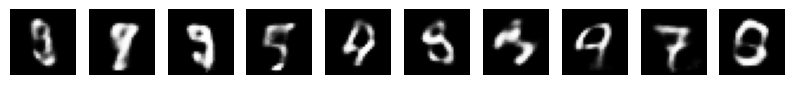

In [ ]:
# VAE 模型
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)


class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)
        # Decoder
        self.fc2 = nn.Linear(latent_dim, 400)
        self.fc3 = nn.Linear(400, 28*28)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def vae_loss(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(latent_dim=20).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 50

for epoch in range(1, epochs+1):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        recon, mu, logvar = model(data)
        loss = vae_loss(recon, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    avg_loss = train_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}, Average Loss: {avg_loss:.4f}")

model.eval()
with torch.no_grad():
    z = torch.randn(10, 20).to(device)  # latent_dim = 20
    samples = model.decode(z).cpu()

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(samples[i].view(28,28), cmap='gray')
    plt.axis('off')
plt.show()


Epoch [1/50] | D Loss: 0.8386 | G Loss: 1.4509
Epoch [2/50] | D Loss: 1.1041 | G Loss: 1.4903
Epoch [3/50] | D Loss: 1.1668 | G Loss: 1.5310
Epoch [4/50] | D Loss: 0.7870 | G Loss: 2.5516
Epoch [5/50] | D Loss: 0.6522 | G Loss: 1.9825
Epoch [6/50] | D Loss: 0.8741 | G Loss: 1.8342
Epoch [7/50] | D Loss: 1.6579 | G Loss: 1.8729
Epoch [8/50] | D Loss: 0.6580 | G Loss: 1.9513
Epoch [9/50] | D Loss: 1.4164 | G Loss: 3.7004
Epoch [10/50] | D Loss: 0.6447 | G Loss: 2.7637
Epoch [11/50] | D Loss: 1.0735 | G Loss: 2.5728
Epoch [12/50] | D Loss: 0.4872 | G Loss: 2.7214
Epoch [13/50] | D Loss: 0.4571 | G Loss: 2.0616
Epoch [14/50] | D Loss: 0.6684 | G Loss: 2.5133
Epoch [15/50] | D Loss: 0.9275 | G Loss: 2.6023
Epoch [16/50] | D Loss: 0.9211 | G Loss: 2.5043
Epoch [17/50] | D Loss: 0.9390 | G Loss: 2.4795
Epoch [18/50] | D Loss: 0.4130 | G Loss: 3.8067
Epoch [19/50] | D Loss: 0.5771 | G Loss: 2.7804
Epoch [20/50] | D Loss: 0.6281 | G Loss: 2.7094
Epoch [21/50] | D Loss: 0.5978 | G Loss: 3.1949
E

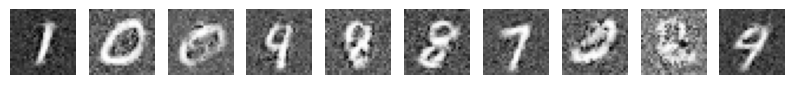

In [ ]:
# GAN模型
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

batch_size = 128
z_dim = 100
epochs = 50
lr = 2e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self, z_dim=100, img_dim=28*28):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, img_dim),
            nn.Tanh(),
        )

    def forward(self, z):
        img = self.model(z)
        return img

class Discriminator(nn.Module):
    def __init__(self, img_dim=28*28):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(img_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

G = Generator(z_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs.view(imgs.size(0), -1).to(device)
        batch_size_curr = real_imgs.size(0)

        real_labels = torch.ones(batch_size_curr, 1).to(device)
        fake_labels = torch.zeros(batch_size_curr, 1).to(device)

        z = torch.randn(batch_size_curr, z_dim).to(device)
        fake_imgs = G(z).detach()

        real_loss = criterion(D(real_imgs), real_labels)
        fake_loss = criterion(D(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        z = torch.randn(batch_size_curr, z_dim).to(device)
        gen_imgs = G(z)
        g_loss = criterion(D(gen_imgs), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

G.eval()
with torch.no_grad():
    z = torch.randn(10, z_dim).to(device)
    gen_imgs = G(z).cpu().view(-1, 1, 28, 28)


gen_imgs = (gen_imgs + 1) / 2

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(gen_imgs[i][0], cmap="gray")
    plt.axis("off")
plt.show()


Epoch [1/50] | D loss: 0.3863 | G loss: 2.2926
Epoch [2/50] | D loss: 0.2937 | G loss: 2.2938
Epoch [3/50] | D loss: 0.4441 | G loss: 3.5488
Epoch [4/50] | D loss: 0.3097 | G loss: 3.2701
Epoch [5/50] | D loss: 0.3590 | G loss: 2.5045
Epoch [6/50] | D loss: 0.3521 | G loss: 6.2197
Epoch [7/50] | D loss: 0.1619 | G loss: 5.8302
Epoch [8/50] | D loss: 0.3642 | G loss: 7.3610
Epoch [9/50] | D loss: 0.2564 | G loss: 2.9943
Epoch [10/50] | D loss: 0.3231 | G loss: 1.9184
Epoch [11/50] | D loss: 0.2953 | G loss: 1.8673
Epoch [12/50] | D loss: 0.4191 | G loss: 1.5122
Epoch [13/50] | D loss: 0.3239 | G loss: 1.7494
Epoch [14/50] | D loss: 0.4245 | G loss: 4.7895
Epoch [15/50] | D loss: 0.6287 | G loss: 7.4513
Epoch [16/50] | D loss: 0.3984 | G loss: 2.6616
Epoch [17/50] | D loss: 0.2083 | G loss: 2.2777
Epoch [18/50] | D loss: 0.3859 | G loss: 1.4701
Epoch [19/50] | D loss: 0.3924 | G loss: 1.5456
Epoch [20/50] | D loss: 0.3545 | G loss: 1.5026
Epoch [21/50] | D loss: 0.3345 | G loss: 1.3784
E

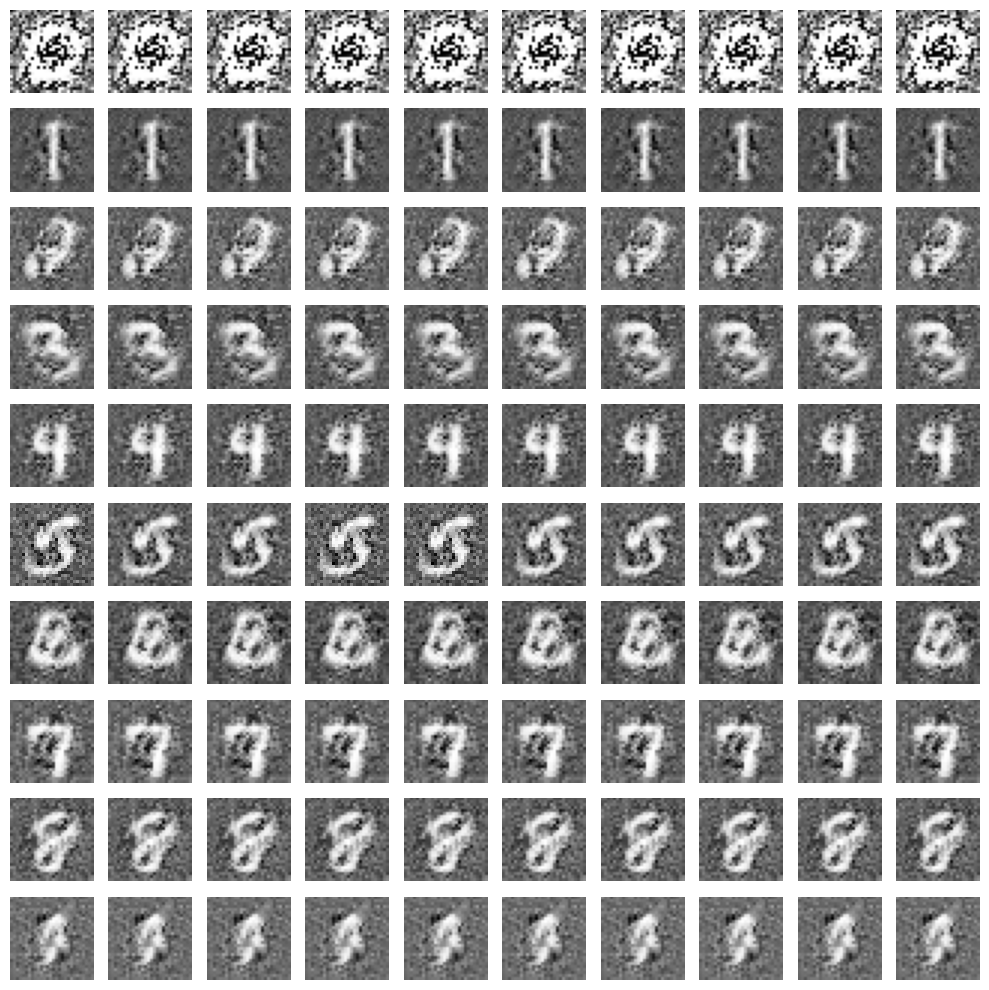

In [ ]:
# cGAN模型
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_dim = 100
num_classes = 10
img_size = 28*28

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, img_size),
            nn.Tanh()  # [-1, 1]
        )
    def forward(self, z, labels):
        c = self.label_emb(labels)
        x = torch.cat([z, c], dim=1)
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(img_size + num_classes, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x, labels):
        c = self.label_emb(labels)
        x = torch.cat([x.view(x.size(0), -1), c], dim=1)
        return self.model(x)

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, 0.999))

epochs = 50
for epoch in range(1, epochs+1):
    for imgs, labels in train_loader:
        batch_size = imgs.size(0)
        imgs, labels = imgs.to(device), labels.to(device)


        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_labels = torch.randint(0, num_classes, (batch_size,), device=device)
        gen_imgs = G(z, gen_labels)
        g_loss = criterion(D(gen_imgs, gen_labels), valid)
        g_loss.backward()
        optimizer_G.step()

        optimizer_D.zero_grad()
        real_loss = criterion(D(imgs, labels), valid)
        fake_loss = criterion(D(gen_imgs.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch [{epoch}/{epochs}] | D loss: {d_loss.item():.4f} | G loss: {g_loss.item():.4f}")

def generate_cgan_samples():
    G.eval()
    n = 10
    z = torch.randn(n*n, latent_dim, device=device)
    labels = torch.tensor([i for i in range(10) for _ in range(10)], device=device)
    gen_imgs = G(z, labels).view(-1, 1, 28, 28).detach().cpu()

    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.imshow(gen_imgs[i].squeeze(), cmap="gray")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

generate_cgan_samples()


Epoch 1/50 Loss: 0.0529
Epoch 2/50 Loss: 0.0638
Epoch 3/50 Loss: 0.0487
Epoch 4/50 Loss: 0.0528
Epoch 5/50 Loss: 0.0488
Epoch 6/50 Loss: 0.0499
Epoch 7/50 Loss: 0.0490
Epoch 8/50 Loss: 0.0532
Epoch 9/50 Loss: 0.0392
Epoch 10/50 Loss: 0.0575
Epoch 11/50 Loss: 0.0414
Epoch 12/50 Loss: 0.0456
Epoch 13/50 Loss: 0.0512
Epoch 14/50 Loss: 0.0403
Epoch 15/50 Loss: 0.0448
Epoch 16/50 Loss: 0.0435
Epoch 17/50 Loss: 0.0395
Epoch 18/50 Loss: 0.0424
Epoch 19/50 Loss: 0.0456
Epoch 20/50 Loss: 0.0404
Epoch 21/50 Loss: 0.0387
Epoch 22/50 Loss: 0.0478
Epoch 23/50 Loss: 0.0369
Epoch 24/50 Loss: 0.0445
Epoch 25/50 Loss: 0.0423
Epoch 26/50 Loss: 0.0389
Epoch 27/50 Loss: 0.0526
Epoch 28/50 Loss: 0.0440
Epoch 29/50 Loss: 0.0396
Epoch 30/50 Loss: 0.0435
Epoch 31/50 Loss: 0.0394
Epoch 32/50 Loss: 0.0436
Epoch 33/50 Loss: 0.0368
Epoch 34/50 Loss: 0.0382
Epoch 35/50 Loss: 0.0429
Epoch 36/50 Loss: 0.0478
Epoch 37/50 Loss: 0.0422
Epoch 38/50 Loss: 0.0382
Epoch 39/50 Loss: 0.0404
Epoch 40/50 Loss: 0.0420
Epoch 41/

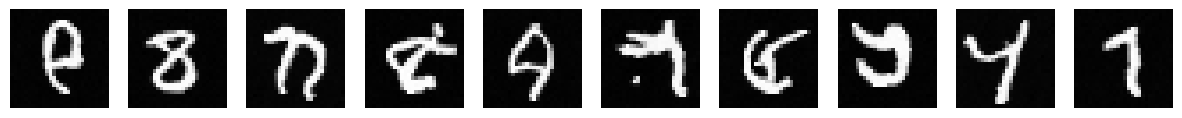

In [ ]:
# Diffusion Model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

batch_size = 128
epochs = 50
lr = 1e-3
T = 300
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x - 0.5) * 2)
])
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

betas = torch.linspace(1e-4, 0.02, T).to(device)
alphas = 1 - betas
alpha_hat = torch.cumprod(alphas, dim=0)

def forward_diffusion(x0, t, device=device):
    noise = torch.randn_like(x0).to(device)
    sqrt_alpha_hat = torch.sqrt(alpha_hat[t])[:, None, None, None]
    sqrt_one_minus_alpha_hat = torch.sqrt(1 - alpha_hat[t])[:, None, None, None]
    return sqrt_alpha_hat * x0 + sqrt_one_minus_alpha_hat * noise, noise

class SinusoidalPosEmb(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, t):
        device = t.device
        half_dim = self.dim // 2
        emb = torch.exp(torch.arange(half_dim, device=device) * -(np.log(10000) / (half_dim - 1)))
        emb = t[:, None] * emb[None, :]
        return torch.cat((emb.sin(), emb.cos()), dim=-1)

class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.time_mlp = nn.Linear(time_emb_dim, out_ch)
        self.res_conv = nn.Conv2d(in_ch, out_ch, 1) if in_ch != out_ch else nn.Identity()

    def forward(self, x, t):
        h = F.relu(self.conv1(x))
        h = h + self.time_mlp(t)[:, :, None, None]
        h = self.conv2(h)
        return F.relu(h + self.res_conv(x))

class UNet(nn.Module):
    def __init__(self, time_emb_dim=64):
        super().__init__()
        self.time_mlp = nn.Sequential(
            SinusoidalPosEmb(time_emb_dim),
            nn.Linear(time_emb_dim, time_emb_dim),
            nn.ReLU()
        )

        self.res1 = ResidualBlock(1, 64, time_emb_dim)
        self.down1 = nn.Conv2d(64, 128, 4, stride=2, padding=1)   # downsample
        self.res2 = ResidualBlock(128, 128, time_emb_dim)
        self.up1 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)  # upsample
        self.res3 = ResidualBlock(64, 64, time_emb_dim)

        self.final = nn.Conv2d(64, 1, 1)

    def forward(self, x, t):
        t_emb = self.time_mlp(t)
        h1 = self.res1(x, t_emb)
        h2 = self.down1(h1)
        h2 = self.res2(h2, t_emb)
        h3 = self.up1(h2)
        h3 = h3 + h1  # skip connection
        h3 = self.res3(h3, t_emb)
        return self.final(h3)

model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
    for x, _ in dataloader:
        x = x.to(device)
        t = torch.randint(0, T, (x.size(0),), device=device).long()
        x_t, noise = forward_diffusion(x, t, device)
        pred_noise = model(x_t, t)
        loss = F.mse_loss(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item():.4f}")

@torch.no_grad()
def sample(model, n=10):
    model.eval()
    x = torch.randn((n, 1, 28, 28)).to(device)
    for t in range(T-1, 0, -1):
        z = torch.randn_like(x) if t > 1 else 0
        alpha = alphas[t]
        alpha_hat_t = alpha_hat[t]
        beta = betas[t]
        pred_noise = model(x, torch.tensor([t]*n, device=device))
        x = (1/torch.sqrt(alpha)) * (x - ((1-alpha)/torch.sqrt(1-alpha_hat_t)) * pred_noise) + torch.sqrt(beta) * z
    return x

samples = sample(model, n=10).cpu()
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow((samples[i].squeeze()+1)/2, cmap="gray")
    axes[i].axis("off")
plt.show()
